Case Study: Opinion Poll Survey Data Analysis

In [1]:
# Import Packages
import numpy as np         
import pandas as pd

In [2]:
#1.Load the dataset into a pandas dataframe. Name the variable as “survey”.
df_Survey= pd.read_excel('D:\\Data Sets\\Dhruv\\Sample Survey.xlsx', sheet_name = 'Data')

In [3]:
# View Data head in data frame
df_Survey.head(3)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762


In [4]:
df_Survey.isnull().sum()

response_id         0
collection_date     0
urban_rural         0
education           0
income              0
Vote_Now            0
Past_Vote           0
CM_satisfaction     0
MLA_satisfaction    0
age                 0
gender              0
assembly_no         0
category            0
weight              0
dtype: int64

In [5]:
# View Data Shape using pandas
df_Survey.shape

(6867, 14)

In [6]:
#Data Types
df_Survey.dtypes

response_id                  int64
collection_date     datetime64[ns]
urban_rural                 object
education                   object
income                      object
Vote_Now                    object
Past_Vote                   object
CM_satisfaction             object
MLA_satisfaction            object
age                          int64
gender                      object
assembly_no                  int64
category                    object
weight                     float64
dtype: object

In [7]:
#Q2.How many samples were collected on each day?
df_Survey['collection_date'].value_counts()

2020-08-24    1479
2020-08-25     998
2020-08-28     761
2020-08-27     665
2020-08-29     620
2020-09-01     607
2020-08-26     598
2020-08-30     582
2020-08-31     557
Name: collection_date, dtype: int64

In [8]:
#3.What proportion of the total respondents were aged less than 45?
age_lessthan_45 = df_Survey.query('age < 45')
age_lessthan1_45 = age_lessthan_45["age"].value_counts().sum()
Respondentsagedlessthan45 = age_lessthan1_45/df_Survey['response_id'].value_counts().sum()*100
Respondentsagedlessthan45


93.18479685452162

In [9]:
df_Survey.age

0       26
1       34
2       25
3       36
4       22
5       38
6       34
7       34
8       23
9       26
10      38
11      42
12      51
13      29
14      24
15      30
16      24
17      39
18      23
19      37
20      39
21      29
22      37
23      38
24      19
25      39
26      22
27      25
28      44
29      26
        ..
6837    32
6838    22
6839    20
6840    45
6841    21
6842    35
6843    24
6844    30
6845    22
6846    31
6847    25
6848    27
6849    20
6850    37
6851    66
6852    28
6853    24
6854    37
6855    30
6856    45
6857    22
6858    24
6859    21
6860    25
6861    22
6862    25
6863    30
6864    20
6865    23
6866    33
Name: age, Length: 6867, dtype: int64

In [10]:
#4.Create a new column in the dataframe “age_group”. This column should contain the age
#group the respondent belongs to. The age groups are 18-25, 25-40, 40-55 and 55+.

df_Survey['age_bins'] = pd.cut(x = df_Survey['age'], bins =[18,25,40,55,100], include_lowest = True)
age_bins = df_Survey['age_bins']
age_bins.value_counts()

(25.0, 40.0]      3423
(17.999, 25.0]    2692
(40.0, 55.0]       644
(55.0, 100.0]      108
Name: age_bins, dtype: int64

In [11]:
 df_Survey['age_group'] = pd.cut(x = df_Survey['age'], bins = [18,25,40,55,100], include_lowest = True, labels= ['18-25', '25-40', '40-55', '55+'])

In [12]:
df_Survey[['response_id', 'age', 'age_group']].head(10)

,response_id,age,age_group
0,1,26,25-40
1,2,34,25-40
2,3,25,18-25
3,4,36,25-40
4,5,22,18-25
5,6,38,25-40
6,7,34,25-40
7,8,34,25-40
8,9,23,18-25
9,10,26,25-40


In [13]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [14]:
#5.How many samples were collected for each age-group? 
print('Below are the samples of each age group:')
df_Survey['age_group'].value_counts()

Below are the samples of each age group:


25-40    3423
18-25    2692
40-55     644
55+       108
Name: age_group, dtype: int64

The age_group of 25-40 has the most samples (i.e 3423):


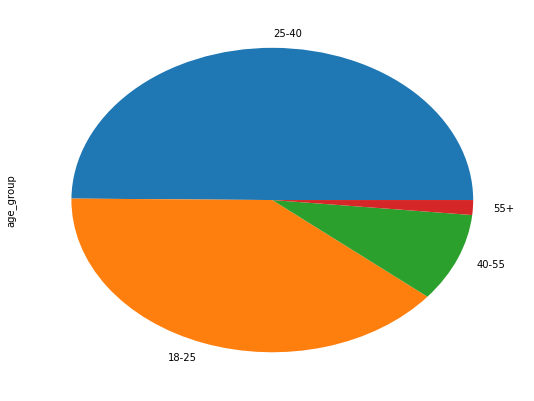

In [15]:
#5.Which age-group had the most samples?
print('The age_group of 25-40 has the most samples (i.e 3423):')
df_Survey['age_group'].value_counts().plot(kind ='pie', figsize = (9,7))

In [16]:
#6.What proportion of the respondents had opted for the RJD party in both the Vote_Now and the Past_Vote questions?
print('29% out of total respondents said they have voted to RJD now!')
RJD_votenow = df_Survey[df_Survey['Vote_Now']=='RJD']
rjdproportion_votenow = RJD_votenow['Vote_Now'].value_counts().sum()/df_Survey['Vote_Now'].value_counts().sum()*100
rjdproportion_votenow.round(3)

29% out of total respondents said they have voted to RJD now!


29.067

In [17]:
print('15% out of total respondents said they have voted to RJD in the past!')
RJD_PastVote = df_Survey[df_Survey['Past_Vote']=='RJD']
rjdproportion_pastvote = RJD_PastVote['Past_Vote'].value_counts().sum()/df_Survey['Past_Vote'].value_counts().sum()*100
rjdproportion_pastvote.round(3)

15% out of total respondents said they have voted to RJD in the past!


15.247

In [18]:
df_Survey.head(10)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_bins,age_group
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,"(25.0, 40.0]",25-40
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,"(25.0, 40.0]",25-40
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762,"(17.999, 25.0]",18-25
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298,"(25.0, 40.0]",25-40
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,"(17.999, 25.0]",18-25
5,6,2020-08-24,Urban,Graduate,"₹ 20,000 - ₹ 30,000",Others,BJP,Somewhat Satisfied,Fully Dissatisfied,38,Male,178,Gen,0.382603,"(25.0, 40.0]",25-40
6,7,2020-08-24,Urban,Graduate,"BPL/Below ₹ 5,000",RJD,BJP,Fully Dissatisfied,Fully Dissatisfied,34,Male,172,BC,0.521283,"(25.0, 40.0]",25-40
7,8,2020-08-24,Rural,Professional Education,"₹ 1,50,000 & above",BJP,JD(U),Somewhat Dissatisfied,Somewhat Dissatisfied,34,Male,186,ST,0.340652,"(25.0, 40.0]",25-40
8,9,2020-08-24,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,Male,181,Gen,0.226477,"(17.999, 25.0]",18-25
9,10,2020-08-24,Urban,12th Pass,"₹ 20,000 - ₹ 30,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,26,Male,181,BC,0.713059,"(25.0, 40.0]",25-40


In [19]:
#Grouping the CM_satisfaction counts as per the date of collection
df_CMsatisfactioncounts = df_Survey.groupby(['collection_date', 'CM_satisfaction'])['CM_satisfaction'].count()
df_CMsatifactmatrix_eachday=df_CMsatisfactioncounts.unstack()
df_CMsatifactmatrix_eachday

CM_satisfaction,Can’t say,Fully Dissatisfied,Fully Satisfied,Somewhat Dissatisfied,Somewhat Satisfied
collection_date,,,,,
2020-08-24,41,642,146,147,503
2020-08-25,34,433,95,90,346
2020-08-26,22,258,59,51,208
2020-08-27,23,294,54,79,215
2020-08-28,29,349,92,82,209
2020-08-29,21,283,73,66,177
2020-08-30,16,250,65,55,196
2020-08-31,23,251,62,51,170
2020-09-01,27,252,75,59,194


In [20]:
#Adding a new column in dataframe and summing up respons count value to insert into the new column called as total
df_CMsatifactmatrix_eachday['Total']=df_CMsatifactmatrix_eachday.loc[:,['Can’t say', 'Fully Dissatisfied', 'Fully Satisfied', 'Somewhat Dissatisfied', 'Somewhat Satisfied']].sum(axis = 1)

In [21]:
print('Below matrix shows the number of sample collected each day:')
df_CMsatifactmatrix_eachday

Below matrix shows the number of sample collected each day:


CM_satisfaction,Can’t say,Fully Dissatisfied,Fully Satisfied,Somewhat Dissatisfied,Somewhat Satisfied,Total
collection_date,,,,,,
2020-08-24,41,642,146,147,503,1479
2020-08-25,34,433,95,90,346,998
2020-08-26,22,258,59,51,208,598
2020-08-27,23,294,54,79,215,665
2020-08-28,29,349,92,82,209,761
2020-08-29,21,283,73,66,177,620
2020-08-30,16,250,65,55,196,582
2020-08-31,23,251,62,51,170,557
2020-09-01,27,252,75,59,194,607


In [22]:
#Calculating count of CM_satisfaction 
df_totalsatisfactioncount_eachday = df_CMsatifactmatrix_eachday['Total']
df_totalsatisfactioncount_eachday

collection_date
2020-08-24    1479
2020-08-25     998
2020-08-26     598
2020-08-27     665
2020-08-28     761
2020-08-29     620
2020-08-30     582
2020-08-31     557
2020-09-01     607
Name: Total, dtype: int64

In [23]:
#Finding out the proportion of Fully Satisfied (CM) respondents in total respondents for each day/date of data collection
print('The below table shows proportion  of ''Fully Satisfied'' respondents of each day sample collection in total samples collection:')
proprtionfullysatisfiedrespond = df_CMsatisfactioncounts/df_totalsatisfactioncount_eachday
df_fullsaty  = proprtionfullysatisfiedrespond.unstack()
df_fullsaty

The below table shows proportion  of Fully Satisfied respondents of each day sample collection in total samples collection:


CM_satisfaction,Can’t say,Fully Dissatisfied,Fully Satisfied,Somewhat Dissatisfied,Somewhat Satisfied
collection_date,,,,,
2020-08-24,0.027721,0.434077,0.098715,0.099391,0.340095
2020-08-25,0.034068,0.433868,0.095190,0.090180,0.346693
2020-08-26,0.036789,0.431438,0.098662,0.085284,0.347826
2020-08-27,0.034586,0.442105,0.081203,0.118797,0.323308
2020-08-28,0.038108,0.458607,0.120894,0.107753,0.274639
2020-08-29,0.033871,0.456452,0.117742,0.106452,0.285484
2020-08-30,0.027491,0.429553,0.111684,0.094502,0.336770
2020-08-31,0.041293,0.450628,0.111311,0.091562,0.305206
2020-09-01,0.044481,0.415157,0.123558,0.097199,0.319605


'''8. In a similar fashion create a day-wise proportion of respondents that opted fully
dissatisfied with their MLA. Create a line plot of the result with date on x-axis and
proportions on the y-axis'''.

In [24]:
#Grouping the MLA_satisfaction counts as per the date of collection
df_MLAsatisfactioncounts = df_Survey.groupby(['collection_date', 'MLA_satisfaction'])['MLA_satisfaction'].count()
df_MLAsatifactmatrix_eachday=df_MLAsatisfactioncounts.unstack()
df_MLAsatifactmatrix_eachday

MLA_satisfaction,Can’t say,Fully Dissatisfied,Fully Satisfied,Somewhat Dissatisfied,Somewhat Satisfied
collection_date,,,,,
2020-08-24,75,887,150,121,246
2020-08-25,46,630,72,70,180
2020-08-26,34,353,62,42,107
2020-08-27,37,403,61,57,107
2020-08-28,38,462,78,56,127
2020-08-29,35,350,71,54,110
2020-08-30,28,361,62,33,98
2020-08-31,30,321,59,45,102
2020-09-01,27,385,55,49,91


In [25]:
#Adding a new column in dataframe and summing up respons count value to insert into the new column called as total
df_MLAsatifactmatrix_eachdaytotal = df_MLAsatifactmatrix_eachday['Total']=df_MLAsatifactmatrix_eachday.loc[:,['Can’t say', 'Fully Dissatisfied', 'Fully Satisfied', 'Somewhat Dissatisfied', 'Somewhat Satisfied']].sum(axis = 1)

In [26]:
print('Below matrix shows the number of sameple collected each day:')
df_MLAsatifactmatrix_eachdaytotal

Below matrix shows the number of sameple collected each day:


collection_date
2020-08-24    1479
2020-08-25     998
2020-08-26     598
2020-08-27     665
2020-08-28     761
2020-08-29     620
2020-08-30     582
2020-08-31     557
2020-09-01     607
dtype: int64

In [27]:
#Finding out the proportion of Fully dissatisfied (MLA) respondents in total respondents for each day/date of data collection
print('The below table shows proportion  of ''Fully Dissatisfied'' respondents of each day sample collection in total samples collection:')
proprtionfullydisatisfiedrespond = df_MLAsatifactmatrix_eachday/df_MLAsatifactmatrix_eachdaytotal
# plot data
figure_data=proprtionfullysatisfiedrespond.unstack()# plot data
figure_data

The below table shows proportion  of Fully Dissatisfied respondents of each day sample collection in total samples collection:


CM_satisfaction,Can’t say,Fully Dissatisfied,Fully Satisfied,Somewhat Dissatisfied,Somewhat Satisfied
collection_date,,,,,
2020-08-24,0.027721,0.434077,0.098715,0.099391,0.340095
2020-08-25,0.034068,0.433868,0.095190,0.090180,0.346693
2020-08-26,0.036789,0.431438,0.098662,0.085284,0.347826
2020-08-27,0.034586,0.442105,0.081203,0.118797,0.323308
2020-08-28,0.038108,0.458607,0.120894,0.107753,0.274639
2020-08-29,0.033871,0.456452,0.117742,0.106452,0.285484
2020-08-30,0.027491,0.429553,0.111684,0.094502,0.336770
2020-08-31,0.041293,0.450628,0.111311,0.091562,0.305206
2020-09-01,0.044481,0.415157,0.123558,0.097199,0.319605


 Proportion of respondents dissatisfied with MLA:


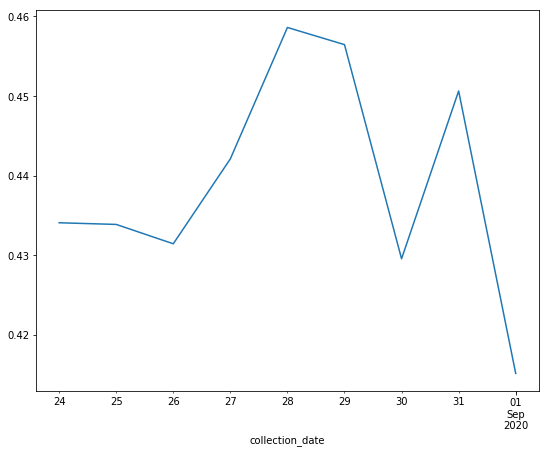

In [28]:
#Create a line plot of the result with date on x-axis and proportions on the y-axis:
# plot data
fig, ax = plt.subplots(figsize=(9,7))
print(" Proportion of respondents dissatisfied with MLA:")
# use unstack()
figure_data.groupby(["collection_date"])["Fully Dissatisfied"].apply(lambda x:x).plot(ax=ax)

In [29]:
#Using CrossTab
pd.crosstab(df_Survey.Past_Vote, df_Survey.Vote_Now, margins = True, margins_name = "Total")

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP,Total
Past_Vote,,,,,,,,,,,,,,,,,,,
BJP,7,1,1630,3,5,42,101,110,44,13,194,32,87,370,88,24,62,10,2823
BSP,0,1,2,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,9
Did not vote,8,5,231,2,1,22,41,69,10,16,83,11,51,195,20,3,31,5,804
HAM,2,0,25,0,1,0,3,2,2,0,4,0,0,6,4,0,1,0,50
INC,0,6,6,0,0,57,10,9,0,3,6,3,3,100,1,2,7,0,213
JAP(L),0,0,4,0,0,0,35,0,0,0,0,1,0,2,0,0,0,0,42
JD(U),6,10,254,2,2,45,72,279,29,9,90,18,43,435,13,25,36,6,1374
LJP,0,0,76,1,0,4,3,6,9,2,3,0,2,17,1,0,1,0,125
Left Front,0,1,2,0,0,1,0,0,0,18,1,1,0,4,0,1,0,1,30


In [30]:
#10.Repeat the above question with the cell values as the sum of “weight”.
pd.crosstab(df_Survey.Past_Vote, df_Survey.Vote_Now, values = df_Survey.weight, aggfunc = 'sum').fillna('-')

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,4.80734,0.349996,1049.34,0.452551,10.1713,50.0555,63.8324,68.0296,45.7162,7.53739,114.914,8.79014,50.0162,250.948,16.0476,18.7151,41.287,18.6917
BSP,-,1.65473,5.17449,32.0103,-,2.29822,-,-,-,-,-,-,-,-,-,-,-,-
Did not vote,8.8659,5.37953,114.204,3.32961,2.49717,27.7913,26.3592,58.9835,11.8018,13.0501,44.7252,7.28993,25.3195,173.883,4.34983,5.04159,22.0155,10.6966
HAM,0.312607,-,25.3489,-,1.64886,-,0.712161,1.00672,2.49642,-,0.928984,-,-,7.71301,1.90315,-,0.0395636,-
INC,-,11.106,1.64288,-,-,161.742,18.9426,11.0773,-,6.26873,5.99901,1.55204,1.58853,195.02,5.3404,1.1403,8.55847,-
JAP(L),-,-,6.51285,-,-,-,57.8762,-,-,-,-,3.19568,-,2.16482,-,-,-,-
JD(U),12.4572,29.1986,156.243,11.0059,2.63957,91.8063,106.217,498.797,33.1481,11.7656,61.1097,29.1961,45.1753,657.156,4.01591,44.3762,58.1378,20.6753
LJP,-,-,85.0105,2.48138,-,21.6134,7.37595,11.3828,26.8685,1.71245,0.813171,-,1.92797,30.738,0.478933,-,1.70941,-
Left Front,-,2.29822,0.209586,-,-,2.29137,-,-,-,44.2809,0.201455,8.3092,-,6.74028,-,0.87796,-,3.02089


In [31]:
#11. Create a dataframe by performing a group by over age_group and calculate the count of
#total samples under each age_group.
df_agegroupCount = df_Survey.groupby("age_group").count().drop("age_bins", axis = 1)
df_agegroupCount1 = df_agegroupCount[0:9]
df_agegroupCount1

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
age_group,,,,,,,,,,,,,,
18-25,2692,2692,2692,2692,2692,2692,2692,2692,2692,2692,2692,2692,2692,2692
25-40,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423
40-55,644,644,644,644,644,644,644,644,644,644,644,644,644,644
55+,108,108,108,108,108,108,108,108,108,108,108,108,108,108


In [32]:
#12. Create a dataframe by performing a group by over age_group and finding the count of
#total samples for each age_group that opted for the JD(U) party in Vote_Now.
df_agegroupJDUparty = df_Survey.groupby(['age_group', 'Vote_Now'])['Vote_Now'].count()
df_agegroupJDUparty1 = df_agegroupJDUparty.unstack().fillna('_')


In [33]:
df_agegroupJDUparty1

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
age_group,,,,,,,,,,,,,,,,,,
18-25,11,15,792.0,9,4,67.0,154.0,216.0,46.0,40.0,197.0,35.0,118,812.0,79,27.0,57.0,13
25-40,14,20,1214.0,6,6,111.0,140.0,245.0,47.0,30.0,209.0,43.0,93,1038.0,56,47.0,91.0,13
40-55,2,2,303.0,_,1,35.0,18.0,55.0,8.0,7.0,44.0,8.0,6,127.0,7,6.0,13.0,2
55+,_,_,58.0,_,_,3.0,1.0,10.0,1.0,2.0,8.0,1.0,_,19.0,_,2.0,3.0,_


In [34]:
df_agegroupJDUparty1['Total']=df_agegroupJDUparty1.loc[:,['AAP', 'AIMIM', 'BJP','BSP', 'HAM', 'INC','JAP(L)', 'JD(U)', 'LJP', 'Left Front', 'NOTA', 'Others', 'Plurals', 'RJD', 'RJJP', 'RLSP', 'Undecided', 'VIP']].sum(axis = 1)
df_agegroupJDUparty1

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP,Total
age_group,,,,,,,,,,,,,,,,,,,
18-25,11,15,792.0,9,4,67.0,154.0,216.0,46.0,40.0,197.0,35.0,118,812.0,79,27.0,57.0,13,2443.0
25-40,14,20,1214.0,6,6,111.0,140.0,245.0,47.0,30.0,209.0,43.0,93,1038.0,56,47.0,91.0,13,3215.0
40-55,2,2,303.0,_,1,35.0,18.0,55.0,8.0,7.0,44.0,8.0,6,127.0,7,6.0,13.0,2,624.0
55+,_,_,58.0,_,_,3.0,1.0,10.0,1.0,2.0,8.0,1.0,_,19.0,_,2.0,3.0,_,108.0


In [35]:
merged_data = pd.merge(df_agegroupCount1, df_agegroupJDUparty1, on = "age_group").head(20)

In [36]:
merged_data

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,...,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP,Total
age_group,,,,,,,,,,,,,,,,,,,,,
18-25,2692,2692,2692,2692,2692,2692,2692,2692,2692,2692,...,40.0,197.0,35.0,118,812.0,79,27.0,57.0,13,2443.0
25-40,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423,...,30.0,209.0,43.0,93,1038.0,56,47.0,91.0,13,3215.0
40-55,644,644,644,644,644,644,644,644,644,644,...,7.0,44.0,8.0,6,127.0,7,6.0,13.0,2,624.0
55+,108,108,108,108,108,108,108,108,108,108,...,2.0,8.0,1.0,_,19.0,_,2.0,3.0,_,108.0
